# Giới Thiệu Bộ Dữ Liệu

## Credit Card Fraud Detection
Giao dịch thẻ tín dụng ẩn danh được gắn nhãn là gian lận hoặc xác thực.

**Bối Cảnh**

Điều quan trọng là các công ty thẻ tín dụng phải có khả năng nhận diện các giao dịch thẻ tín dụng gian lận để khách hàng không bị tính phí cho những mặt hàng mà họ không mua.

**Nội Dung**

Bộ dữ liệu chứa các giao dịch được thực hiện bằng thẻ tín dụng vào tháng 9 năm 2013 bởi chủ thẻ châu Âu.

Bộ dữ liệu này trình bày các giao dịch xảy ra trong hai ngày, với 492 vụ gian lận trong tổng số 284.807 giao dịch. Tập dữ liệu này rất mất cân bằng, nhóm tích cực (gian lận) chiếm 0,172% tổng số giao dịch.

Bộ dữ liệu chỉ chứa các biến đầu vào dạng số, là kết quả của phép biến đổi PCA. Rất tiếc, do vấn đề bảo mật, chúng tôi không thể cung cấp các đặc điểm gốc và thông tin cơ bản hơn về dữ liệu. Các đặc điểm V1, V2, … V28 là các thành phần chính thu được bằng PCA, các đặc điểm duy nhất chưa được biến đổi bằng PCA là 'Thời gian' và 'Số tiền'. Đặc điểm 'Thời gian' chứa số giây trôi qua giữa mỗi giao dịch và giao dịch đầu tiên trong tập dữ liệu. Đặc điểm 'Số tiền' là Số tiền giao dịch, đặc điểm này có thể được sử dụng cho việc học nhạy cảm với chi phí phụ thuộc vào ví dụ. Đặc điểm 'Lớp' là biến phản hồi và nhận giá trị 1 trong trường hợp gian lận và 0 trong trường hợp ngược lại.

Do tỷ lệ mất cân bằng lớp, chúng tôi khuyến nghị đo độ chính xác bằng cách sử dụng the Area Under the Precision-Recall Curve (AUPRC). Độ chính xác của ma trận nhầm lẫn không có ý nghĩa đối với phân loại không cân bằng.

# Import Thư Viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Dữ Liệu

### Đọc Dữ Liệu

In [40]:
df = pd.read_csv("creditcard.csv")

### Mô Tả Dữ Liệu

In [41]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Bộ dữ liệu lớn gồm 31 cột và mỗi cột gồm 284807 dòng, kích thước phù hợp để huấn luyện các mô hình ML phức tạp.

**Non-Null Count**: Cột này hiển thị số lượng giá trị không rỗng của từng cột trong bộ dữ liệu. Nếu con số này bằng với tổng số dòng (284,807) thì dữ liệu đầy đủ về mặt giá trị không cần xử lý giá trị bị thiếu.

**Dtype**: Toàn bộ dữ liệu chỉ có 2 loại dữ liệu là float64, int64 là dạng số học (Numerical) lợi thế giúp xử lý dữ liệu trực tiếp mà không cần mã hoá Encoding các biến phân loại Categorical.

In [42]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Kiểm Tra Trùng Lặp (Duplicates)

In [43]:
# In số lượng dòng trùng lặp trong DataFrame
print(df.duplicated().sum())

1081


In [44]:
# Xoá bỏ các dòng trùng lặp
df = df.drop_duplicates()

# Kiểm tra lại kích thước dữ liệu
print(df.shape)

(283726, 31)


### Tỷ Lệ Classes

In [45]:
# Đém số giao dịch gian lận và không gian lận
fraud_counts = df['Class'].value_counts()
print(fraud_counts)

Class
0    283253
1       473
Name: count, dtype: int64


Chú Thích:

    - Giao dịch bình thường: 0.
    
    - Giao dịch gian lận: 1.

Trong 283726 giao dịch thì ta có 283253 giao dịch được ghi nhận là giao dịch bình thường và 473 giao dịch là giao dịch gian lận.

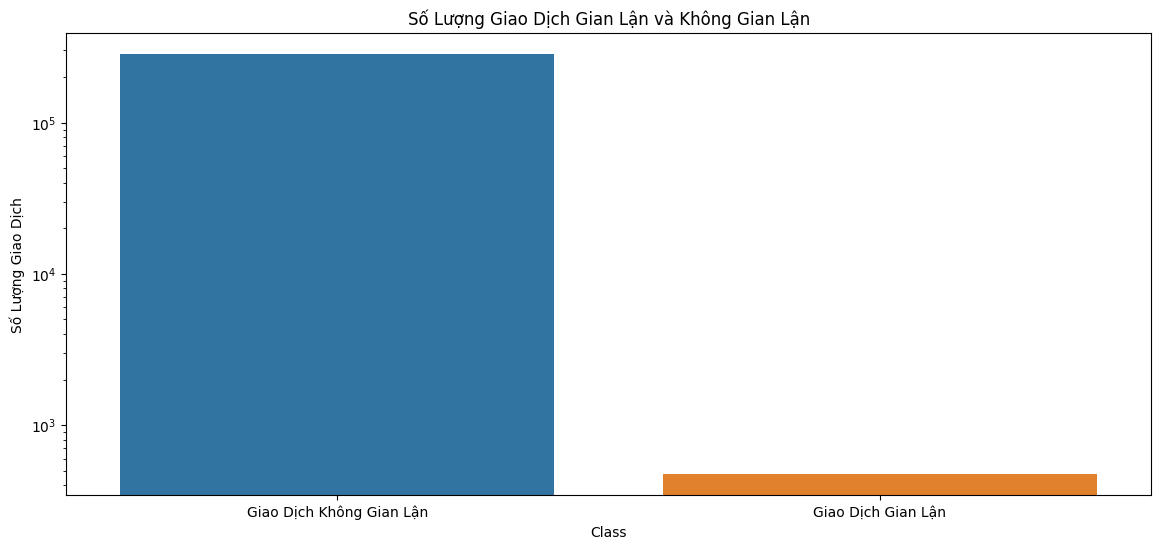

In [46]:
# Vẽ biểu đồ cột cho số lượng giao dịch gian lận và không gian lận
plt.figure(figsize=(14,6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0, 1], ['Giao Dịch Không Gian Lận', 'Giao Dịch Gian Lận'])
plt.ylabel('Số Lượng Giao Dịch')
plt.title('Số Lượng Giao Dịch Gian Lận và Không Gian Lận')
plt.yscale('log')
plt.show()

Với 473 giao dịch gian lận so với 283253 giao dịch bình thường, ta có sự chêch lệch số lượng là rất lớn và sẽ khiến cho cột "Giao dịch gian lận" biến mất hoàn toàn trên biểu đồ khi đặt cạnh cột "Giao dịch không gian lận".

Nhờ việc chuyển đổi trục tung Y(Số lượng giao dịch) sang luỹ thừa, cột "Gian Lận" đã hiện thị rõ ràng hơn, xác nhận rằng dù số lượng ít nhưng các giao dịch gian lận vẫn có và cần được tách biệt.

### Kỹ Thuật Đặc Trưng

In [47]:
# Chuyển đổi biến 'Time' từ giây sang giờ trong ngày thành một biến mới 'HourOfDay'
df['Hour'] = df['Time'] // 3600 % 24

Biến **Time** Giá trị gốc là tổng số giây trôi qua kể từ giao dịch đầu tiên. Đây là một biến liên tục và tuyệt đối, không mang tính chu kỳ, khó nắm bắt các quy luật về thời điểm gian lận diễn ra trong ngày.

Tạo ra biến **HourOfDay** cho phép mô hình ML phát hiện các khung giờ có rủi ro giạn lận cao.

Kết Luận: Giúp mô hình có khả năng phân tách giữa giao dịch bình thường và giao dịch gian lận hiệu quả hơn nhiều so với việc sử dụng biến 'Time' gốc.

### Chia Tỷ Lệ Tính Năng

In [48]:
# tạo Scaler cho 'Amount' và 'Hour'
scaler = StandardScaler()

# thực hiện scaling
# Hàm fit_transform yêu cầu input là mảng 2 chiều nên cần .reshape(-1, 1)
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_hour'] = scaler.fit_transform(df['Hour'].values.reshape(-1, 1))

# Dọn dẹp: Xóa các cột gốc đã được thay thế
df = df.drop(['Time','Hour', 'Amount'], axis=1)

# Kiểm tra kết quả scaling
print(df.head())
print(df[['scaled_amount', 'scaled_hour']].describe().round(2))


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_amount  scaled_hour  

In [50]:
print("Độ lệch chuẩn (std) của Amount sau scale:", df['scaled_amount'].std())
print("Độ lệch chuẩn (std) của Hour sau scale:", df['scaled_hour'].std())

Độ lệch chuẩn (std) của Amount sau scale: 1.0000017622682507
Độ lệch chuẩn (std) của Hour sau scale: 1.0000017622682504


In [51]:
# Đếm số lượng ngoại lai trong cột Amount (đã scale)
# Quy tắc 3-sigma: Giá trị > 3 hoặc < -3 là ngoại lai
outliers_count = df[(df['scaled_amount'] > 3) | (df['scaled_amount'] < -3)].shape[0]

print(f"Tổng số giao dịch ngoại lai (Outliers) phát hiện được: {outliers_count}")
print(f"Tỉ lệ ngoại lai: {outliers_count / df.shape[0] * 100:.2f}%")

Tổng số giao dịch ngoại lai (Outliers) phát hiện được: 4063
Tỉ lệ ngoại lai: 1.43%


### Xử lý mất cân bằng dữ liệu (SMOTE/Undersampling)

In [55]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Chuẩn bị dữ liệu cho mô hình
X = df.drop('Class', axis=1)
y = df['Class']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

# Tạo từ điển các phương pháp sampling
samplers = {
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

# Mô hình Decision Tree
model = DecisionTreeClassifier(random_state=42)

for name, sampler in samplers.items():

    # Khởi tạo Pipeline: Bước 1 là Sampling -> Bước 2 là Model
    pipeline = ImbPipeline(steps=[
        ('sampler', sampler),
        ('model', model)
    ])

    # Huấn luyện Pipeline trên tập Train
    pipeline.fit(X_train, y_train)
    
    # Đánh giá mô hình trên tập kiểm tra
    test_score = pipeline.score(X_test, y_test)
    print(f"Accuracy trên tập kiểm tra với {name}: {test_score:.4f}")
    
    # Lưu mô hình đã huấn luyện
    joblib.dump(pipeline, f'decision_tree_{name.lower()}.joblib')



Kích thước tập huấn luyện: (226980, 30)
Kích thước tập kiểm tra: (56746, 30)
Accuracy trên tập kiểm tra với SMOTE: 0.9974
Accuracy trên tập kiểm tra với SMOTE: 0.9974
Accuracy trên tập kiểm tra với RandomOverSampler: 0.9991
Accuracy trên tập kiểm tra với RandomUnderSampler: 0.9243
Accuracy trên tập kiểm tra với RandomOverSampler: 0.9991
Accuracy trên tập kiểm tra với RandomUnderSampler: 0.9243
